# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import collections
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing The Dataset**

In [2]:
df=pd.read_csv('rainfall in india 1901-2015.csv')
df1=pd.read_csv('district wise rainfall normal.csv')
df2=pd.read_csv('weather.csv')

# **Handling Missing Values**

In [3]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN             True
FEB             True
MAR             True
APR             True
MAY             True
JUN             True
JUL             True
AUG             True
SEP             True
OCT             True
NOV             True
DEC             True
ANNUAL          True
Jan-Feb         True
Mar-May         True
Jun-Sep         True
Oct-Dec         True
dtype: bool

In [4]:
df1.isnull().any()

STATE_UT_NAME    False
DISTRICT         False
JAN              False
FEB              False
MAR              False
APR              False
MAY              False
JUN              False
JUL              False
AUG              False
SEP              False
OCT              False
NOV              False
DEC              False
ANNUAL           False
Jan-Feb          False
Mar-May          False
Jun-Sep          False
Oct-Dec          False
dtype: bool

In [5]:
df2.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [6]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [9]:
df1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      STATE_UT_NAME  DISTRICT    JAN    FEB    MAR    APR    MAY    JUN    JUL  \
0            False     False  False  False  False  False  False  False  False   
1            False     False  False  False  False  False  False  False  False   
2            False     False  False  False  False  False  False  False  False   
3            False     False  False  False  False  False  False  False  False   
4            False     False  False  False  False  False  False  False  False   
..             ...       ...    ...    ...    ...    ...    ...    ...    ...   
636          False     False  False  False  False  False  False  False  False   
637          False     False  False  False  False  False  False  False  False   
638          False     False  False  False  False  False  False  False  False   
639          False     False  False  False  False  False  False  False  False   
640          False     False  False  False  Fal

In [8]:
df2.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [11]:
df.shape

(4116, 19)

In [12]:
df = df.dropna(axis = 0, how ='any')
df.shape

(4090, 19)

In [13]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [14]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [15]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

In [17]:
df1.shape

(641, 19)

In [19]:
df1 = df1.dropna(axis = 0, how ='any')
df1.shape

(641, 19)

In [20]:
df1.isnull().any()

STATE_UT_NAME    False
DISTRICT         False
JAN              False
FEB              False
MAR              False
APR              False
MAY              False
JUN              False
JUL              False
AUG              False
SEP              False
OCT              False
NOV              False
DEC              False
ANNUAL           False
Jan-Feb          False
Mar-May          False
Jun-Sep          False
Oct-Dec          False
dtype: bool

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [18]:
df2.shape

(366, 22)

In [21]:
df2 = df2.dropna(axis = 0, how ='any')
df2.shape

(328, 22)

In [22]:
df2.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustDir    328 non-null    object 
 6   WindGustSpeed  328 non-null    float64
 7   WindDir9am     328 non-null    object 
 8   WindDir3pm     328 non-null    object 
 9   WindSpeed9am   328 non-null    float64
 10  WindSpeed3pm   328 non-null    int64  
 11  Humidity9am    328 non-null    int64  
 12  Humidity3pm    328 non-null    int64  
 13  Pressure9am    328 non-null    float64
 14  Pressure3pm    328 non-null    float64
 15  Cloud9am       328 non-null    int64  
 16  Cloud3pm       328 non-null    int64  
 17  Temp9am        328 non-null    float64
 18  Temp3pm   

In [25]:
df.YEAR.value_counts()

1969    36
1993    36
1971    36
1970    36
1994    36
        ..
1927    35
1917    34
1943    34
1903    34
1909    34
Name: YEAR, Length: 115, dtype: int64

In [26]:
df1.DISTRICT.value_counts()

BIJAPUR        2
BILASPUR       2
AURANGABAD     2
HAMIRPUR       2
NICOBAR        1
              ..
GONDA          1
GORAKHPUR      1
HARDOI         1
JAUNPUR        1
LAKSHADWEEP    1
Name: DISTRICT, Length: 637, dtype: int64

In [27]:
subs = df['SUBDIVISION'].unique()
print (subs)
print ('TOTAL SUBDIVISIONS: ', len(subs))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
TOTAL SUBDIVISIONS:  36


In [28]:
unique_state_counts_yearwise = df.groupby(by='YEAR')[['SUBDIVISION']].count()['SUBDIVISION'].value_counts()

print (unique_state_counts_yearwise)

36    69
35    42
34     4
Name: SUBDIVISION, dtype: int64


In [29]:
state_count = df.groupby(by='SUBDIVISION')[['ANNUAL']].count().sort_values(by='ANNUAL')
print (state_count.head(10))

                           ANNUAL
SUBDIVISION                      
ARUNACHAL PRADESH              91
LAKSHADWEEP                   103
ANDAMAN & NICOBAR ISLANDS     104
COASTAL KARNATAKA             114
JAMMU & KASHMIR               114
WEST MADHYA PRADESH           114
VIDARBHA                      115
UTTARAKHAND                   115
TELANGANA                     115
TAMIL NADU                    115


In [30]:
overall = df.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values(by='ANNUAL', ascending=False)
overall.head()

,ANNUAL
SUBDIVISION,
COASTAL KARNATAKA,388558.7
KONKAN & GOA,342433.9
KERALA,336431.1
SUB HIMALAYAN WEST BENGAL & SIKKIM,316505.0
ARUNACHAL PRADESH,311116.0


In [31]:
highest_sub = overall.index.values[0]
lowest_sub = overall.index.values[-1]
print ('Highest rain in: ', highest_sub)
print ('Lowest rain in: ', lowest_sub)

Highest rain in:  COASTAL KARNATAKA
Lowest rain in:  WEST RAJASTHAN


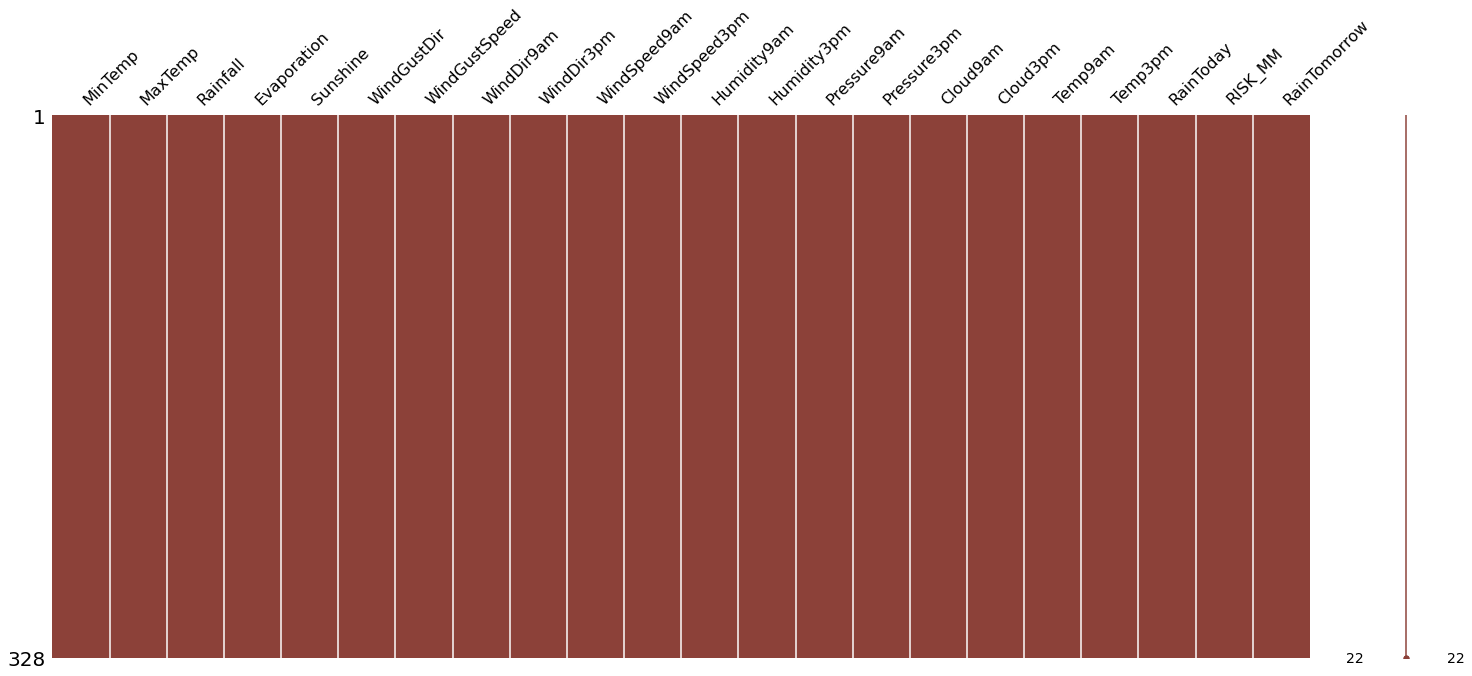

In [32]:
import missingno as msno
msno.matrix(df2,color=(0.55,0.255,0.225),fontsize=16)